In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

9

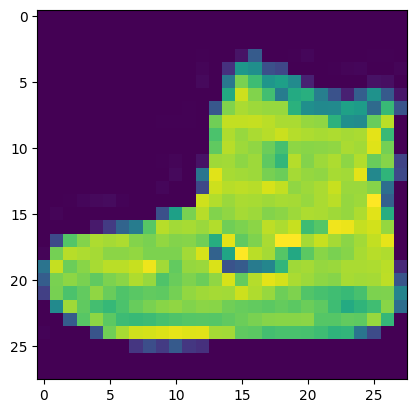

In [14]:
plt.imshow(X_train_full[0])
y_train_full[0]

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandel", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

normalisation

## can use MinMaxScaler for normalization

In [15]:
x_train_n = X_train_full / 255.0
x_test_n = X_test / 255.0

split

In [16]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

## random seed used to replicate same results

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

## Sequential model API

here we will use ReLu for hidden layers and softmax in output layer
300 neurons in hidden layer and 10 in softmax

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


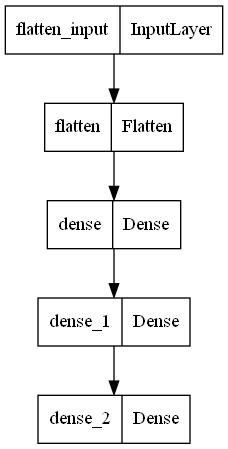

In [22]:
import pydot
keras.utils.plot_model(model)

In [23]:
weights, biases = model.layers[1].get_weights()

In [24]:
weights

array([[-0.01992601,  0.04351112,  0.06384037, ..., -0.00850482,
         0.0520107 , -0.00790429],
       [-0.05448634,  0.02707018,  0.04588866, ..., -0.0409508 ,
        -0.00797925,  0.04091786],
       [-0.06440783,  0.04226436, -0.04381044, ..., -0.06205436,
         0.03247886,  0.00341214],
       ...,
       [-0.03207675,  0.02591864, -0.0570396 , ...,  0.06479914,
        -0.00315459,  0.00194643],
       [-0.05795022, -0.01801808, -0.00174778, ..., -0.00469697,
         0.00604767,  0.02132418],
       [ 0.0453356 ,  0.0053241 ,  0.04754788, ..., -0.05587247,
         0.05980867, -0.04009594]], dtype=float32)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
weights.shape

(784, 300)

### here we have labels for each category so use sparse_categorical_crossentropy, if we had probabilities for each category, we use categorical_crossentropy, if binary labels then binary_cross_entropy

In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### sgd is sto. gradient descent that is we are doing back prpopagation

### if regression we use mean sq error for error and mean absolute error metrics 

### If you have UNEVEN representation in class, you need to use class weights while Fitting below

In [29]:
model_history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 35s 19ms/step - loss: 0.7129 - accuracy: 0.7666 - val_loss: 0.5149 - val_accuracy: 0.8238
Epoch 2/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4853 - accuracy: 0.8303 - val_loss: 0.4322 - val_accuracy: 0.8532
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4410 - accuracy: 0.8447 - val_loss: 0.5191 - val_accuracy: 0.8090
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4153 - accuracy: 0.8555 - val_loss: 0.3932 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3964 - accuracy: 0.8617 - val_loss: 0.3787 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3777 - accuracy: 0.8669 - val_loss: 0.3748 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3653 - accuracy: 0.8706 - val_loss: 0.3656 - val_accura

In [30]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
model_history.history

{'loss': [0.7128909230232239,
  0.4853082597255707,
  0.44102177023887634,
  0.415268212556839,
  0.3964446783065796,
  0.37773656845092773,
  0.3652645945549011,
  0.3536483943462372,
  0.34286943078041077,
  0.33366695046424866,
  0.3256072700023651,
  0.316539466381073,
  0.3096376061439514,
  0.30356115102767944,
  0.29622969031333923,
  0.2913975119590759,
  0.285846471786499,
  0.27954456210136414,
  0.2745802700519562,
  0.26974958181381226,
  0.264379620552063,
  0.259773850440979,
  0.25549593567848206,
  0.2511664032936096,
  0.246666818857193,
  0.24256379902362823,
  0.23911017179489136,
  0.23573260009288788,
  0.23121017217636108,
  0.22761014103889465],
 'accuracy': [0.7666000127792358,
  0.8302727341651917,
  0.8446545600891113,
  0.8555454611778259,
  0.86165452003479,
  0.8668909072875977,
  0.8705818057060242,
  0.8744909167289734,
  0.8789636492729187,
  0.880618155002594,
  0.8833272457122803,
  0.8864727020263672,
  0.8893091082572937,
  0.891981840133667,
  0.894

plot all accuracy, loss, val loss and accuracy

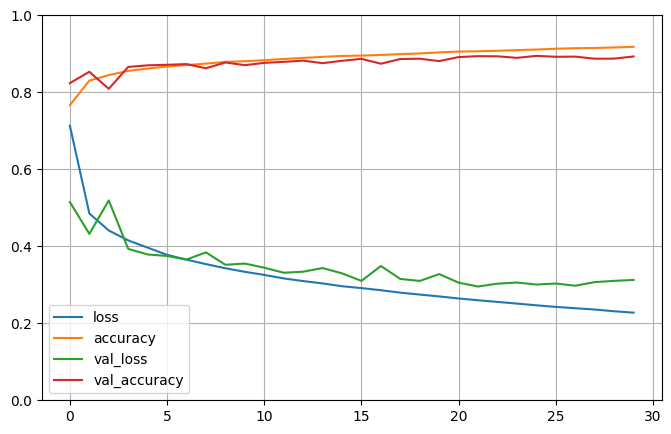

In [32]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

performance

In [33]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.3425 - accuracy: 0.8805


[0.3424723744392395, 0.8805000185966492]

1st is loss, 2nd accuracy

taking 3 data to test it 

In [34]:
x_new = x_test[:3]

In [36]:
y_prob = model.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 32ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
y_pred_classes = y_prob.argmax(axis=-1)
y_pred_classes

array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_pred_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

match with images

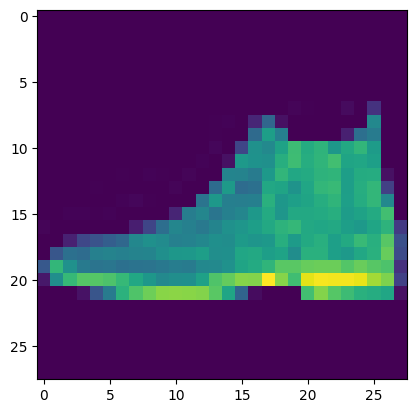

In [42]:
plt.imshow(x_test[0])

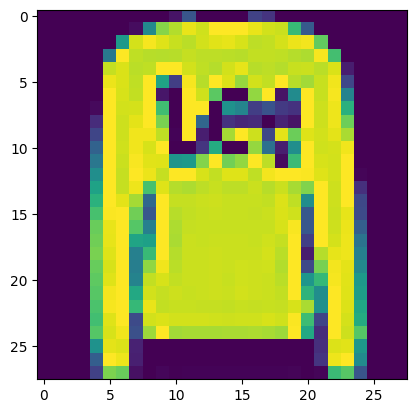

In [45]:
plt.imshow(x_test[1])

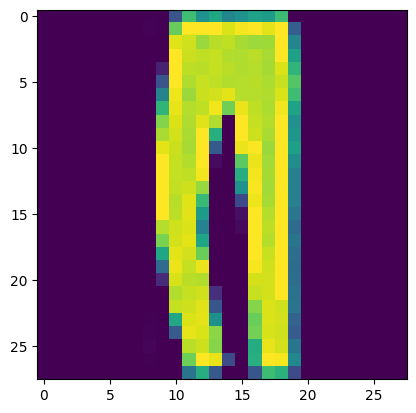

In [46]:
plt.imshow(x_test[2])